# TiO2 Summarised Ground State Results

## Basis Functions
I am using MT radii of (Ti, O) = (1.80, 1.50), which are not nearly-touching but retain the optimal ratio for consistent precision in the total energy.
This choice was made following an initial analysis of RHO1D.xml for larger MT radii, where the charge minimum fell within the radius of Ti.

Basis for Ti defined in Ti.xml.
Basis for O defined in O.xml. The oyxgen basis functions were not investigated, as we assume that those found for ZrO system were optimal.

### LOs in the Valence
Valence states for Ti start at 3s. From `atoms.xml`, the next-lowest state (2p) has an energy of -16.24 Ha. This should be a core state.

l max goes to 5 for both species, for ground state. This will be explored further during the GW calculations.
LO recommendations for Ti were generated for some undocumented rgkmax and k-sampling values, however the recommendations do not change too much.

As such, I question which of these choices is the optimal strategy for trial energies of high-energy LOs:
* Should one leave searchE = True for high-energy LOs, as I have done for Ti.
* or
* In the case of oxygen, I have left all high-energy LOs with trial energies of 1.0 and searchE = True.

I *assume* this has a negligible effect on the ground state total energy and fundamental gap, however I have not checked it.

## Input Settings
For the choice of LO settings presented here, I checked the effect of rgkmax on the total energy and the estimated fundamental gap.
I also plotted the band structure.

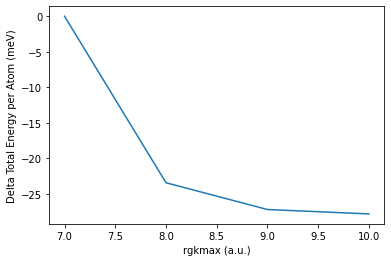

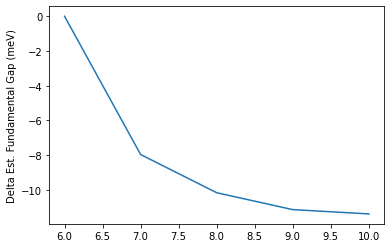

The change in total energy per atom from rgkmax = 8 to 10 is: 4.3910129143120455 meV
The change in estimated fundamental gap from rgkmax = 8 to 10 is: 1.2198870620002609 meV
The change in total energy per atom from rgkmax = 9 to 10 is: 0.6194675210498114 meV
The change in estimated fundamental gap from rgkmax = 9 to 10 is: 0.247079512000232 meV


In [5]:
"""Convergence w.r.t rgkmax
"""
import matplotlib.pyplot as plt

from src.materials import TiO2Rutile

ha_to_ev = 27.2114
ha_to_mev = ha_to_ev * 1000.

rgkmax = [6., 7., 8., 9., 10.]
gmaxvr = [21.0, 21.0, 24.0, 27.0, 27.0]

total_energy = [-2006.15957615, -2006.19029423, -2006.19546499, -2006.19629660, -2006.19643319]
est_fundamental_gap = [0.06686570, 0.06657311, 0.06649230, 0.06645655, 0.06644747]
n_atoms = len(TiO2Rutile.elements)

# Plot data
plt.rcParams['axes.formatter.useoffset'] = False
plt.xlabel("rgkmax (a.u.)")
plt.ylabel("Delta Total Energy per Atom (meV)")
plt.plot(rgkmax[1:], [ (x-total_energy[1]) * ha_to_mev / n_atoms for x in total_energy[1:]])
plt.show()

plt.ylabel("Delta Est. Fundamental Gap (meV)")
plt.plot(rgkmax, [(x-est_fundamental_gap[0]) * ha_to_mev for x in est_fundamental_gap])
plt.show()

delta_e = abs(total_energy[2] - total_energy[4]) * ha_to_mev / n_atoms
print(f'The change in total energy per atom from rgkmax = 8 to 10 is: {delta_e} meV')
delta_gap = abs(est_fundamental_gap[2] - est_fundamental_gap[4]) * ha_to_mev
print(f'The change in estimated fundamental gap from rgkmax = 8 to 10 is: {delta_gap} meV')

delta_e = abs(total_energy[3] - total_energy[4]) * ha_to_mev / n_atoms
print(f'The change in total energy per atom from rgkmax = 9 to 10 is: {delta_e} meV')
delta_gap = abs(est_fundamental_gap[3] - est_fundamental_gap[4]) * ha_to_mev
print(f'The change in estimated fundamental gap from rgkmax = 9 to 10 is: {delta_gap} meV')

**NOTE**: I am not sure what the appropriate accuracy in the ground state is.

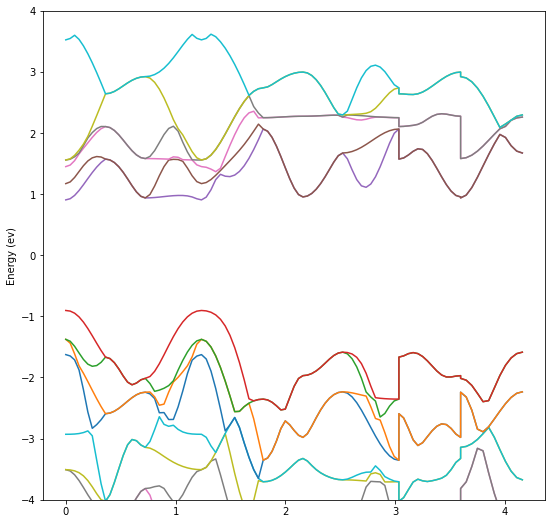

In [7]:
"""Band Structure, generated with rgkmax = 9.0 and gmaxvr= 27.0
(note, one can probably afford to reduce gmaxvr)
"""
import matplotlib.pyplot as plt

from src.parsers import parse_bandstructure_xml

k_points, band_energies = parse_bandstructure_xml('../calculations/bandstructure.xml')
ha_to_ev = 27.2114
fig, ax = plt.subplots(figsize=(9, 9))
n_bands = band_energies.shape[1]

# I did not bother adding the k-point labels
plt.ylim(-4, 4)
plt.ylabel('Energy (ev)')
for ib in range(0, n_bands):
    plt.plot(k_points, ha_to_ev * band_energies[:, ib])